# Exercise sheet 11

## Exercise 2 - Possonain salamanders

For this exercise, you will need to load the dataset salamanders from the rethinking library. These data come from a published study (https://www.fs.fed.us/psw/publications/welsh/welsh8.pdf) where the authors studied the habitat properties of the Del Norte salamanders in NW California. There are three columns: site is the site number. All of the 47 sites are each 49m2 in surface. salaman is the head count of salamanders in each site. pctcover is the percentage of ground surface covered by rocks. forestage is the age of the trees in each site.

In [1]:
library(rethinking)
data(salamanders)
d <- salamanders
d$site <- d$SITE
d$salamanders <- d$SALAMAN
d$cover <- d$PCTCOVER / 100
d$forest <- d$FORESTAGE
d

Lade nötiges Paket: rstan

Lade nötiges Paket: StanHeaders


rstan version 2.26.16 (Stan version 2.26.1)


For execution on a local, multicore CPU with excess RAM we recommend calling
options(mc.cores = parallel::detectCores()).
To avoid recompilation of unchanged Stan programs, we recommend calling
rstan_options(auto_write = TRUE)
For within-chain threading using `reduce_sum()` or `map_rect()` Stan functions,
change `threads_per_chain` option:
rstan_options(threads_per_chain = 1)


Do not specify '-march=native' in 'LOCAL_CPPFLAGS' or a Makevars file

Lade nötiges Paket: cmdstanr

This is cmdstanr version 0.5.3

- CmdStanR documentation and vignettes: mc-stan.org/cmdstanr

- CmdStan path: D:/Users/Immanuel/Documents/.cmdstan/cmdstan-2.31.0

- CmdStan version: 2.31.0


A newer version of CmdStan is available. See ?install_cmdstan() to install it.
To disable this check set option or environment variable CMDSTANR_NO_VER_CHECK=TRUE.

Lade nötiges Paket: parallel

rethinking (Version 2.31)

SITE,SALAMAN,PCTCOVER,FORESTAGE,site,salamanders,cover,forest
<int>,<int>,<int>,<int>,<int>,<int>,<dbl>,<int>
1,13,85,316,1,13,0.85,316
2,11,86,88,2,11,0.86,88
3,11,90,548,3,11,0.90,548
4,9,88,64,4,9,0.88,64
5,8,89,43,5,8,0.89,43
6,7,83,368,6,7,0.83,368
7,6,83,200,7,6,0.83,200
8,6,91,71,8,6,0.91,71
9,5,88,42,9,5,0.88,42


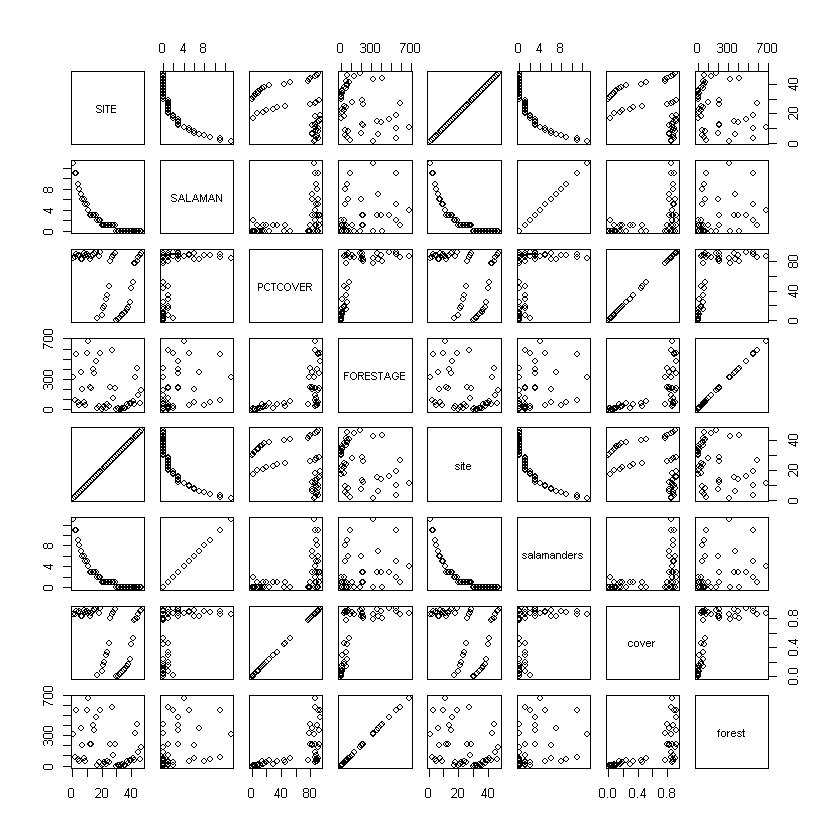

In [7]:
pairs(d)

---

Explore the relationship between salamander density and rock cover using a Poisson model. What is the expected head count of salamanders with rock cover, along with the credible intervals? Is there any problem with the model? How could it be improved?

---

In [2]:
model1 <- map2stan(
	alist(
		salamanders ~ dpois(lambda),
		log(lambda) <- off[site],
		off[site] ~ dnorm(a, sigma),
		a ~ dnorm(0, 1),
		sigma ~ dcauchy(0, 1)		
	),
	data = d, iter = 4000, chains = 16, cores = 16
)

Warning message in map2stan(alist(salamanders ~ dpois(lambda), log(lambda) <- off[site], :
"DEPRECATED: map2stan is no longer supported and may behave unpredictably or stop working altogether. Start using ulam instead."
Warning in 'C:/Users/Immanuel/AppData/Local/Temp/RtmpG2PiN1/model-36a8225d5ae4.stan', line 5, column 4: Declaration
    of arrays by placing brackets after a variable name is deprecated and
    will be removed in Stan 2.32.0. Instead use the array keyword before the
    type. This can be changed automatically using the auto-format flag to
    stanc
Warning in 'C:/Users/Immanuel/AppData/Local/Temp/RtmpG2PiN1/model-36a8225d5ae4.stan', line 6, column 4: Declaration
    of arrays by placing brackets after a variable name is deprecated and
    will be removed in Stan 2.32.0. Instead use the array keyword before the
    type. This can be changed automatically using the auto-format flag to
    stanc




Running MCMC with 16 parallel chains...

Chain 1 Iteration:    1 / 4000 [  0%]  (Warmup) 
Chain 1 Iteration:  100 / 4000 [  2%]  (Warmup) 
Chain 1 Iteration:  200 / 4000 [  5%]  (Warmup) 
Chain 1 Iteration:  300 / 4000 [  7%]  (Warmup) 
Chain 1 Iteration:  400 / 4000 [ 10%]  (Warmup) 
Chain 1 Iteration:  500 / 4000 [ 12%]  (Warmup) 
Chain 1 Iteration:  600 / 4000 [ 15%]  (Warmup) 
Chain 1 Iteration:  700 / 4000 [ 17%]  (Warmup) 
Chain 1 Iteration:  800 / 4000 [ 20%]  (Warmup) 
Chain 1 Iteration:  900 / 4000 [ 22%]  (Warmup) 
Chain 1 Iteration: 1000 / 4000 [ 25%]  (Warmup) 
Chain 1 Iteration: 1100 / 4000 [ 27%]  (Warmup) 
Chain 2 Iteration:    1 / 4000 [  0%]  (Warmup) 
Chain 2 Iteration:  100 / 4000 [  2%]  (Warmup) 
Chain 2 Iteration:  200 / 4000 [  5%]  (Warmup) 
Chain 2 Iteration:  300 / 4000 [  7%]  (Warmup) 
Chain 2 Iteration:  400 / 4000 [ 10%]  (Warmup) 
Chain 2 Iteration:  500 / 4000 [ 12%]  (Warmup) 
Chain 2 Iteration:  600 / 4000 [ 15%]  (Warmup) 
Chain 2 Iteration:  700 / 40

Chain 10 Informational Message: The current Metropolis proposal is about to be rejected because of the following issue:

Chain 10 Exception: normal_lpdf: Scale parameter is 0, but must be positive! (in 'C:/Users/Immanuel/AppData/Local/Temp/RtmpG2PiN1/model-36a8225d5ae4.stan', line 17, column 4 to column 30)

Chain 10 If this warning occurs sporadically, such as for highly constrained variable types like covariance matrices, then the sampler is fine,

Chain 10 but if this warning occurs often then your model may be either severely ill-conditioned or misspecified.

Chain 10 



Chain 11 Iteration:    1 / 4000 [  0%]  (Warmup) 
Chain 11 Iteration:  100 / 4000 [  2%]  (Warmup) 
Chain 11 Iteration:  200 / 4000 [  5%]  (Warmup) 
Chain 11 Iteration:  300 / 4000 [  7%]  (Warmup) 
Chain 11 Iteration:  400 / 4000 [ 10%]  (Warmup) 
Chain 11 Iteration:  500 / 4000 [ 12%]  (Warmup) 
Chain 12 Iteration:    1 / 4000 [  0%]  (Warmup) 
Chain 12 Iteration:  100 / 4000 [  2%]  (Warmup) 
Chain 12 Iteration:  200 / 4000 [  5%]  (Warmup) 
Chain 12 Iteration:  300 / 4000 [  7%]  (Warmup) 
Chain 12 Iteration:  400 / 4000 [ 10%]  (Warmup) 
Chain 12 Iteration:  500 / 4000 [ 12%]  (Warmup) 
Chain 13 Iteration:    1 / 4000 [  0%]  (Warmup) 
Chain 13 Iteration:  100 / 4000 [  2%]  (Warmup) 
Chain 13 Iteration:  200 / 4000 [  5%]  (Warmup) 
Chain 13 Iteration:  300 / 4000 [  7%]  (Warmup) 
Chain 13 Iteration:  400 / 4000 [ 10%]  (Warmup) 
Chain 14 Iteration:    1 / 4000 [  0%]  (Warmup) 
Chain 14 Iteration:  100 / 4000 [  2%]  (Warmup) 
Chain 14 Iteration:  200 / 4000 [  5%]  (Warmup) 


Computing WAIC



In [3]:
model_cover <- map2stan(
	alist(
		salamanders ~ dpois(lambda),
		log(lambda) <- off[site] + slope_cover[site] * cover,
		off[site] ~ dnorm(a, sigma),
		a ~ dnorm(0, 1),
		sigma ~ dcauchy(0, 1),
		slope_cover[site] ~ dnorm(b_cover, sigma_cover),
		b_cover ~ dnorm(0, 1),
		sigma_cover ~ dcauchy(0, 1)
	),
	data = d, iter = 4000, chains = 16, cores = 16
)

Warning message in map2stan(alist(salamanders ~ dpois(lambda), log(lambda) <- off[site] + :
"DEPRECATED: map2stan is no longer supported and may behave unpredictably or stop working altogether. Start using ulam instead."
Warning in 'C:/Users/Immanuel/AppData/Local/Temp/RtmpG2PiN1/model-36a83d57b1d.stan', line 5, column 4: Declaration
    of arrays by placing brackets after a variable name is deprecated and
    will be removed in Stan 2.32.0. Instead use the array keyword before the
    type. This can be changed automatically using the auto-format flag to
    stanc
Warning in 'C:/Users/Immanuel/AppData/Local/Temp/RtmpG2PiN1/model-36a83d57b1d.stan', line 6, column 4: Declaration
    of arrays by placing brackets after a variable name is deprecated and
    will be removed in Stan 2.32.0. Instead use the array keyword before the
    type. This can be changed automatically using the auto-format flag to
    stanc
Warning in 'C:/Users/Immanuel/AppData/Local/Temp/RtmpG2PiN1/model-36a83d57b1d.s

Running MCMC with 16 parallel chains...

Chain 1 Iteration:    1 / 4000 [  0%]  (Warmup) 
Chain 1 Iteration:  100 / 4000 [  2%]  (Warmup) 
Chain 1 Iteration:  200 / 4000 [  5%]  (Warmup) 
Chain 1 Iteration:  300 / 4000 [  7%]  (Warmup) 
Chain 2 Iteration:    1 / 4000 [  0%]  (Warmup) 
Chain 2 Iteration:  100 / 4000 [  2%]  (Warmup) 
Chain 2 Iteration:  200 / 4000 [  5%]  (Warmup) 
Chain 2 Iteration:  300 / 4000 [  7%]  (Warmup) 
Chain 3 Iteration:    1 / 4000 [  0%]  (Warmup) 


Chain 3 Informational Message: The current Metropolis proposal is about to be rejected because of the following issue:

Chain 3 Exception: normal_lpdf: Scale parameter is 0, but must be positive! (in 'C:/Users/Immanuel/AppData/Local/Temp/RtmpG2PiN1/model-36a83d57b1d.stan', line 21, column 4 to column 50)

Chain 3 If this warning occurs sporadically, such as for highly constrained variable types like covariance matrices, then the sampler is fine,

Chain 3 but if this warning occurs often then your model may be either severely ill-conditioned or misspecified.

Chain 3 



Chain 4 Iteration:    1 / 4000 [  0%]  (Warmup) 
Chain 4 Iteration:  100 / 4000 [  2%]  (Warmup) 
Chain 4 Iteration:  200 / 4000 [  5%]  (Warmup) 


Chain 4 Informational Message: The current Metropolis proposal is about to be rejected because of the following issue:

Chain 4 Exception: normal_lpdf: Scale parameter is 0, but must be positive! (in 'C:/Users/Immanuel/AppData/Local/Temp/RtmpG2PiN1/model-36a83d57b1d.stan', line 24, column 4 to column 30)

Chain 4 If this warning occurs sporadically, such as for highly constrained variable types like covariance matrices, then the sampler is fine,

Chain 4 but if this warning occurs often then your model may be either severely ill-conditioned or misspecified.

Chain 4 



Chain 5 Iteration:    1 / 4000 [  0%]  (Warmup) 
Chain 5 Iteration:  100 / 4000 [  2%]  (Warmup) 
Chain 6 Iteration:    1 / 4000 [  0%]  (Warmup) 
Chain 6 Iteration:  100 / 4000 [  2%]  (Warmup) 
Chain 6 Iteration:  200 / 4000 [  5%]  (Warmup) 


Chain 6 Informational Message: The current Metropolis proposal is about to be rejected because of the following issue:

Chain 6 Exception: normal_lpdf: Scale parameter is 0, but must be positive! (in 'C:/Users/Immanuel/AppData/Local/Temp/RtmpG2PiN1/model-36a83d57b1d.stan', line 24, column 4 to column 30)

Chain 6 If this warning occurs sporadically, such as for highly constrained variable types like covariance matrices, then the sampler is fine,

Chain 6 but if this warning occurs often then your model may be either severely ill-conditioned or misspecified.

Chain 6 



Chain 7 Iteration:    1 / 4000 [  0%]  (Warmup) 
Chain 7 Iteration:  100 / 4000 [  2%]  (Warmup) 
Chain 8 Iteration:    1 / 4000 [  0%]  (Warmup) 
Chain 9 Iteration:    1 / 4000 [  0%]  (Warmup) 
Chain 10 Iteration:    1 / 4000 [  0%]  (Warmup) 
Chain 11 Iteration:    1 / 4000 [  0%]  (Warmup) 
Chain 12 Iteration:    1 / 4000 [  0%]  (Warmup) 
Chain 13 Iteration:    1 / 4000 [  0%]  (Warmup) 
Chain 13 Iteration:  100 / 4000 [  2%]  (Warmup) 


Chain 13 Informational Message: The current Metropolis proposal is about to be rejected because of the following issue:

Chain 13 Exception: normal_lpdf: Scale parameter is 0, but must be positive! (in 'C:/Users/Immanuel/AppData/Local/Temp/RtmpG2PiN1/model-36a83d57b1d.stan', line 24, column 4 to column 30)

Chain 13 If this warning occurs sporadically, such as for highly constrained variable types like covariance matrices, then the sampler is fine,

Chain 13 but if this warning occurs often then your model may be either severely ill-conditioned or misspecified.

Chain 13 



Chain 14 Iteration:    1 / 4000 [  0%]  (Warmup) 
Chain 15 Iteration:    1 / 4000 [  0%]  (Warmup) 
Chain 15 Iteration:  100 / 4000 [  2%]  (Warmup) 


Chain 15 Informational Message: The current Metropolis proposal is about to be rejected because of the following issue:

Chain 15 Exception: normal_lpdf: Scale parameter is 0, but must be positive! (in 'C:/Users/Immanuel/AppData/Local/Temp/RtmpG2PiN1/model-36a83d57b1d.stan', line 24, column 4 to column 30)

Chain 15 If this warning occurs sporadically, such as for highly constrained variable types like covariance matrices, then the sampler is fine,

Chain 15 but if this warning occurs often then your model may be either severely ill-conditioned or misspecified.

Chain 15 



Chain 16 Iteration:    1 / 4000 [  0%]  (Warmup) 
Chain 1 Iteration:  400 / 4000 [ 10%]  (Warmup) 
Chain 1 Iteration:  500 / 4000 [ 12%]  (Warmup) 
Chain 1 Iteration:  600 / 4000 [ 15%]  (Warmup) 
Chain 1 Iteration:  700 / 4000 [ 17%]  (Warmup) 
Chain 1 Iteration:  800 / 4000 [ 20%]  (Warmup) 
Chain 1 Iteration:  900 / 4000 [ 22%]  (Warmup) 
Chain 1 Iteration: 1000 / 4000 [ 25%]  (Warmup) 
Chain 1 Iteration: 1100 / 4000 [ 27%]  (Warmup) 
Chain 1 Iteration: 1200 / 4000 [ 30%]  (Warmup) 
Chain 1 Iteration: 1300 / 4000 [ 32%]  (Warmup) 
Chain 1 Iteration: 1400 / 4000 [ 35%]  (Warmup) 
Chain 1 Iteration: 1500 / 4000 [ 37%]  (Warmup) 
Chain 1 Iteration: 1600 / 4000 [ 40%]  (Warmup) 
Chain 1 Iteration: 1700 / 4000 [ 42%]  (Warmup) 
Chain 1 Iteration: 1800 / 4000 [ 45%]  (Warmup) 
Chain 1 Iteration: 1900 / 4000 [ 47%]  (Warmup) 
Chain 2 Iteration:  400 / 4000 [ 10%]  (Warmup) 
Chain 2 Iteration:  500 / 4000 [ 12%]  (Warmup) 
Chain 2 Iteration:  600 / 4000 [ 15%]  (Warmup) 
Chain 2 Iteration: 

See https://mc-stan.org/misc/warnings for details.


See https://mc-stan.org/misc/warnings for details.


Computing WAIC

Warning message in map2stan(alist(salamanders ~ dpois(lambda), log(lambda) <- off[site] + :
"There were 3335 divergent iterations during sampling.
Check the chains (trace plots, n_eff, Rhat) carefully to ensure they are valid."


In [5]:
compare(model1, model_cover)

,WAIC,SE,dWAIC,dSE,pWAIC,weight
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
model_cover,155.5444,12.22445,0.000000,NA,15.57854,0.8658098
model1,159.2732,11.88465,3.728813,3.921403,18.98822,0.1341902


[ 1000 / 1000 ]


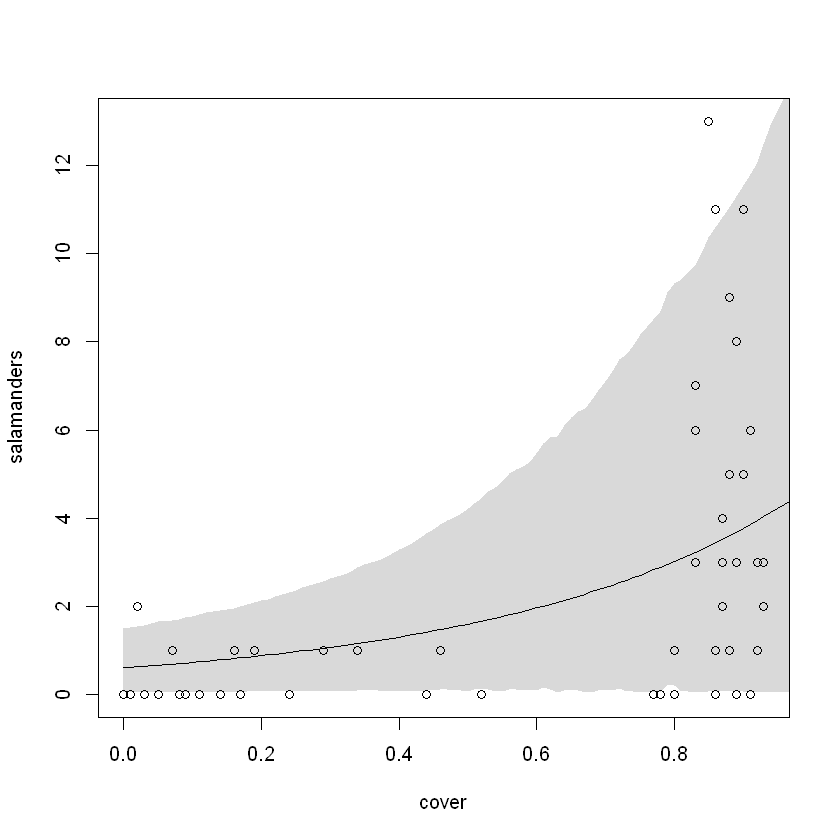

In [18]:
post_cover <- extract.samples(model_cover)

cover_seq <- seq(from = 0, to = 1, by = 0.01)

mu <- link(model_cover, data = list(cover = cover_seq, site = 20)) #?????
mu.mean <- apply(mu, 2, mean)
mu.HPDI <- apply(mu, 2, HPDI, prob = 0.96)

plot(salamanders ~ cover, data = d, xlab = "cover", ylab = "salamanders")
lines(cover_seq, mu.mean)
shade(mu.HPDI, cover_seq)

Oh no, our model is directly depending on the sites! For `site = 20` we get the most data inside our credible interval.

---

Include the age of trees in the dataset, using the model parameterisation of your choice (try several). How does that help in better defining the head count prediction in each site? Is there any over-dispersion that would need to be accounted for?

---

In [20]:
model_forest <- map2stan(
	alist(
		salamanders ~ dpois(lambda),
		log(lambda) <- off[site] + slope_forest[site] * forest,
		off[site] ~ dnorm(a, sigma),
		a ~ dnorm(0, 1),
		sigma ~ dcauchy(0, 1),
		slope_forest[site] ~ dnorm(b_forest, sigma_forest),
		b_forest ~ dnorm(0, 1),
		sigma_forest ~ dcauchy(0, 1)
	),
	data = d, iter = 4000, chains = 16, cores = 16
)

Warning message in map2stan(alist(salamanders ~ dpois(lambda), log(lambda) <- off[site] + :
"DEPRECATED: map2stan is no longer supported and may behave unpredictably or stop working altogether. Start using ulam instead."
Warning in 'C:/Users/Immanuel/AppData/Local/Temp/RtmpG2PiN1/model-36a834dd3c96.stan', line 5, column 4: Declaration
    of arrays by placing brackets after a variable name is deprecated and
    will be removed in Stan 2.32.0. Instead use the array keyword before the
    type. This can be changed automatically using the auto-format flag to
    stanc
Warning in 'C:/Users/Immanuel/AppData/Local/Temp/RtmpG2PiN1/model-36a834dd3c96.stan', line 6, column 4: Declaration
    of arrays by placing brackets after a variable name is deprecated and
    will be removed in Stan 2.32.0. Instead use the array keyword before the
    type. This can be changed automatically using the auto-format flag to
    stanc
Warning in 'C:/Users/Immanuel/AppData/Local/Temp/RtmpG2PiN1/model-36a834dd3c9

Running MCMC with 16 parallel chains...



Chain 1 Rejecting initial value:

Chain 1   Log probability evaluates to log(0), i.e. negative infinity.

Chain 1   Stan can't start sampling from this initial value.

Chain 1 Rejecting initial value:

Chain 1   Log probability evaluates to log(0), i.e. negative infinity.

Chain 1   Stan can't start sampling from this initial value.



Chain 1 Iteration:    1 / 4000 [  0%]  (Warmup) 
Chain 1 Iteration:  100 / 4000 [  2%]  (Warmup) 
Chain 1 Iteration:  200 / 4000 [  5%]  (Warmup) 
Chain 1 Iteration:  300 / 4000 [  7%]  (Warmup) 
Chain 1 Iteration:  400 / 4000 [ 10%]  (Warmup) 
Chain 1 Iteration:  500 / 4000 [ 12%]  (Warmup) 
Chain 1 Iteration:  600 / 4000 [ 15%]  (Warmup) 
Chain 1 Iteration:  700 / 4000 [ 17%]  (Warmup) 
Chain 1 Iteration:  800 / 4000 [ 20%]  (Warmup) 
Chain 1 Iteration:  900 / 4000 [ 22%]  (Warmup) 


Chain 2 Rejecting initial value:

Chain 2   Gradient evaluated at the initial value is not finite.

Chain 2   Stan can't start sampling from this initial value.

Chain 2 Rejecting initial value:

Chain 2   Log probability evaluates to log(0), i.e. negative infinity.

Chain 2   Stan can't start sampling from this initial value.

Chain 2 Rejecting initial value:

Chain 2   Log probability evaluates to log(0), i.e. negative infinity.

Chain 2   Stan can't start sampling from this initial value.

Chain 2 Rejecting initial value:

Chain 2   Log probability evaluates to log(0), i.e. negative infinity.

Chain 2   Stan can't start sampling from this initial value.

Chain 2 Rejecting initial value:

Chain 2   Log probability evaluates to log(0), i.e. negative infinity.

Chain 2   Stan can't start sampling from this initial value.

Chain 2 Rejecting initial value:

Chain 2   Log probability evaluates to log(0), i.e. negative infinity.

Chain 2   Stan can't start sampling from this initial value.

Chain 2 Iteration:    1 / 4000 [  0%]  (Warmup) 
Chain 2 Iteration:  100 / 4000 [  2%]  (Warmup) 
Chain 2 Iteration:  200 / 4000 [  5%]  (Warmup) 
Chain 2 Iteration:  300 / 4000 [  7%]  (Warmup) 
Chain 2 Iteration:  400 / 4000 [ 10%]  (Warmup) 
Chain 2 Iteration:  500 / 4000 [ 12%]  (Warmup) 
Chain 2 Iteration:  600 / 4000 [ 15%]  (Warmup) 
Chain 2 Iteration:  700 / 4000 [ 17%]  (Warmup) 
Chain 2 Iteration:  800 / 4000 [ 20%]  (Warmup) 


Chain 2 Informational Message: The current Metropolis proposal is about to be rejected because of the following issue:

Chain 2 Exception: normal_lpdf: Scale parameter is 0, but must be positive! (in 'C:/Users/Immanuel/AppData/Local/Temp/RtmpG2PiN1/model-36a834dd3c96.stan', line 21, column 4 to column 53)

Chain 2 If this warning occurs sporadically, such as for highly constrained variable types like covariance matrices, then the sampler is fine,

Chain 2 but if this warning occurs often then your model may be either severely ill-conditioned or misspecified.

Chain 2 



Chain 3 Iteration:    1 / 4000 [  0%]  (Warmup) 
Chain 3 Iteration:  100 / 4000 [  2%]  (Warmup) 
Chain 3 Iteration:  200 / 4000 [  5%]  (Warmup) 
Chain 3 Iteration:  300 / 4000 [  7%]  (Warmup) 
Chain 3 Iteration:  400 / 4000 [ 10%]  (Warmup) 
Chain 3 Iteration:  500 / 4000 [ 12%]  (Warmup) 
Chain 3 Iteration:  600 / 4000 [ 15%]  (Warmup) 


Chain 3 Informational Message: The current Metropolis proposal is about to be rejected because of the following issue:

Chain 3 Exception: normal_lpdf: Scale parameter is 0, but must be positive! (in 'C:/Users/Immanuel/AppData/Local/Temp/RtmpG2PiN1/model-36a834dd3c96.stan', line 21, column 4 to column 53)

Chain 3 If this warning occurs sporadically, such as for highly constrained variable types like covariance matrices, then the sampler is fine,

Chain 3 but if this warning occurs often then your model may be either severely ill-conditioned or misspecified.

Chain 3 

Chain 4 Rejecting initial value:

Chain 4   Log probability evaluates to log(0), i.e. negative infinity.

Chain 4   Stan can't start sampling from this initial value.

Chain 4 Rejecting initial value:

Chain 4   Log probability evaluates to log(0), i.e. negative infinity.

Chain 4   Stan can't start sampling from this initial value.

Chain 4 Rejecting initial value:

Chain 4   Log probability evaluates to log(0), i.e. ne

Chain 4 Iteration:    1 / 4000 [  0%]  (Warmup) 
Chain 4 Iteration:  100 / 4000 [  2%]  (Warmup) 
Chain 4 Iteration:  200 / 4000 [  5%]  (Warmup) 
Chain 4 Iteration:  300 / 4000 [  7%]  (Warmup) 
Chain 4 Iteration:  400 / 4000 [ 10%]  (Warmup) 
Chain 4 Iteration:  500 / 4000 [ 12%]  (Warmup) 
Chain 4 Iteration:  600 / 4000 [ 15%]  (Warmup) 
Chain 4 Iteration:  700 / 4000 [ 17%]  (Warmup) 


Chain 5 Rejecting initial value:

Chain 5   Log probability evaluates to log(0), i.e. negative infinity.

Chain 5   Stan can't start sampling from this initial value.

Chain 5 Rejecting initial value:

Chain 5   Log probability evaluates to log(0), i.e. negative infinity.

Chain 5   Stan can't start sampling from this initial value.

Chain 5 Rejecting initial value:

Chain 5   Log probability evaluates to log(0), i.e. negative infinity.

Chain 5   Stan can't start sampling from this initial value.

Chain 5 Rejecting initial value:

Chain 5   Log probability evaluates to log(0), i.e. negative infinity.

Chain 5   Stan can't start sampling from this initial value.

Chain 5 Rejecting initial value:

Chain 5   Log probability evaluates to log(0), i.e. negative infinity.

Chain 5   Stan can't start sampling from this initial value.

Chain 5 Rejecting initial value:

Chain 5   Log probability evaluates to log(0), i.e. negative infinity.

Chain 5   Stan can't start sampling from this initial 

Chain 5 Iteration:    1 / 4000 [  0%]  (Warmup) 
Chain 5 Iteration:  100 / 4000 [  2%]  (Warmup) 
Chain 5 Iteration:  200 / 4000 [  5%]  (Warmup) 
Chain 5 Iteration:  300 / 4000 [  7%]  (Warmup) 
Chain 5 Iteration:  400 / 4000 [ 10%]  (Warmup) 
Chain 5 Iteration:  500 / 4000 [ 12%]  (Warmup) 
Chain 5 Iteration:  600 / 4000 [ 15%]  (Warmup) 


Chain 5 Informational Message: The current Metropolis proposal is about to be rejected because of the following issue:

Chain 5 Exception: normal_lpdf: Scale parameter is 0, but must be positive! (in 'C:/Users/Immanuel/AppData/Local/Temp/RtmpG2PiN1/model-36a834dd3c96.stan', line 21, column 4 to column 53)

Chain 5 If this warning occurs sporadically, such as for highly constrained variable types like covariance matrices, then the sampler is fine,

Chain 5 but if this warning occurs often then your model may be either severely ill-conditioned or misspecified.

Chain 5 

Chain 6 Rejecting initial value:

Chain 6   Log probability evaluates to log(0), i.e. negative infinity.

Chain 6   Stan can't start sampling from this initial value.

Chain 6 Rejecting initial value:

Chain 6   Log probability evaluates to log(0), i.e. negative infinity.

Chain 6   Stan can't start sampling from this initial value.

Chain 6 Rejecting initial value:

Chain 6   Log probability evaluates to log(0), i.e. ne

Chain 6 Iteration:    1 / 4000 [  0%]  (Warmup) 
Chain 6 Iteration:  100 / 4000 [  2%]  (Warmup) 
Chain 6 Iteration:  200 / 4000 [  5%]  (Warmup) 
Chain 6 Iteration:  300 / 4000 [  7%]  (Warmup) 
Chain 6 Iteration:  400 / 4000 [ 10%]  (Warmup) 
Chain 6 Iteration:  500 / 4000 [ 12%]  (Warmup) 


Chain 7 Rejecting initial value:

Chain 7   Log probability evaluates to log(0), i.e. negative infinity.

Chain 7   Stan can't start sampling from this initial value.

Chain 7 Rejecting initial value:

Chain 7   Log probability evaluates to log(0), i.e. negative infinity.

Chain 7   Stan can't start sampling from this initial value.



Chain 7 Iteration:    1 / 4000 [  0%]  (Warmup) 
Chain 7 Iteration:  100 / 4000 [  2%]  (Warmup) 
Chain 7 Iteration:  200 / 4000 [  5%]  (Warmup) 
Chain 7 Iteration:  300 / 4000 [  7%]  (Warmup) 
Chain 7 Iteration:  400 / 4000 [ 10%]  (Warmup) 
Chain 7 Iteration:  500 / 4000 [ 12%]  (Warmup) 
Chain 7 Iteration:  600 / 4000 [ 15%]  (Warmup) 


Chain 7 Informational Message: The current Metropolis proposal is about to be rejected because of the following issue:

Chain 7 Exception: normal_lpdf: Scale parameter is 0, but must be positive! (in 'C:/Users/Immanuel/AppData/Local/Temp/RtmpG2PiN1/model-36a834dd3c96.stan', line 24, column 4 to column 30)

Chain 7 If this warning occurs sporadically, such as for highly constrained variable types like covariance matrices, then the sampler is fine,

Chain 7 but if this warning occurs often then your model may be either severely ill-conditioned or misspecified.

Chain 7 

Chain 8 Rejecting initial value:

Chain 8   Log probability evaluates to log(0), i.e. negative infinity.

Chain 8   Stan can't start sampling from this initial value.

Chain 8 Rejecting initial value:

Chain 8   Log probability evaluates to log(0), i.e. negative infinity.

Chain 8   Stan can't start sampling from this initial value.

Chain 8 Rejecting initial value:

Chain 8   Log probability evaluates to log(0), i.e. ne

Chain 8 Iteration:    1 / 4000 [  0%]  (Warmup) 
Chain 8 Iteration:  100 / 4000 [  2%]  (Warmup) 
Chain 8 Iteration:  200 / 4000 [  5%]  (Warmup) 
Chain 8 Iteration:  300 / 4000 [  7%]  (Warmup) 
Chain 8 Iteration:  400 / 4000 [ 10%]  (Warmup) 
Chain 8 Iteration:  500 / 4000 [ 12%]  (Warmup) 


Chain 9 Rejecting initial value:

Chain 9   Log probability evaluates to log(0), i.e. negative infinity.

Chain 9   Stan can't start sampling from this initial value.

Chain 9 Rejecting initial value:

Chain 9   Log probability evaluates to log(0), i.e. negative infinity.

Chain 9   Stan can't start sampling from this initial value.

Chain 9 Rejecting initial value:

Chain 9   Log probability evaluates to log(0), i.e. negative infinity.

Chain 9   Stan can't start sampling from this initial value.



Chain 9 Iteration:    1 / 4000 [  0%]  (Warmup) 
Chain 9 Iteration:  100 / 4000 [  2%]  (Warmup) 
Chain 9 Iteration:  200 / 4000 [  5%]  (Warmup) 
Chain 9 Iteration:  300 / 4000 [  7%]  (Warmup) 
Chain 9 Iteration:  400 / 4000 [ 10%]  (Warmup) 
Chain 9 Iteration:  500 / 4000 [ 12%]  (Warmup) 


Chain 10 Rejecting initial value:

Chain 10   Log probability evaluates to log(0), i.e. negative infinity.

Chain 10   Stan can't start sampling from this initial value.



Chain 10 Iteration:    1 / 4000 [  0%]  (Warmup) 
Chain 10 Iteration:  100 / 4000 [  2%]  (Warmup) 
Chain 10 Iteration:  200 / 4000 [  5%]  (Warmup) 
Chain 10 Iteration:  300 / 4000 [  7%]  (Warmup) 
Chain 10 Iteration:  400 / 4000 [ 10%]  (Warmup) 
Chain 10 Iteration:  500 / 4000 [ 12%]  (Warmup) 


Chain 10 Informational Message: The current Metropolis proposal is about to be rejected because of the following issue:

Chain 10 Exception: normal_lpdf: Scale parameter is 0, but must be positive! (in 'C:/Users/Immanuel/AppData/Local/Temp/RtmpG2PiN1/model-36a834dd3c96.stan', line 21, column 4 to column 53)

Chain 10 If this warning occurs sporadically, such as for highly constrained variable types like covariance matrices, then the sampler is fine,

Chain 10 but if this warning occurs often then your model may be either severely ill-conditioned or misspecified.

Chain 10 

Chain 11 Rejecting initial value:

Chain 11   Log probability evaluates to log(0), i.e. negative infinity.

Chain 11   Stan can't start sampling from this initial value.

Chain 11 Rejecting initial value:

Chain 11   Log probability evaluates to log(0), i.e. negative infinity.

Chain 11   Stan can't start sampling from this initial value.

Chain 11 Rejecting initial value:

Chain 11   Log probability evaluates to lo

Chain 11 Iteration:    1 / 4000 [  0%]  (Warmup) 
Chain 11 Iteration:  100 / 4000 [  2%]  (Warmup) 
Chain 11 Iteration:  200 / 4000 [  5%]  (Warmup) 
Chain 11 Iteration:  300 / 4000 [  7%]  (Warmup) 
Chain 11 Iteration:  400 / 4000 [ 10%]  (Warmup) 
Chain 11 Iteration:  500 / 4000 [ 12%]  (Warmup) 


Chain 11 Informational Message: The current Metropolis proposal is about to be rejected because of the following issue:

Chain 11 Exception: normal_lpdf: Scale parameter is 0, but must be positive! (in 'C:/Users/Immanuel/AppData/Local/Temp/RtmpG2PiN1/model-36a834dd3c96.stan', line 24, column 4 to column 30)

Chain 11 If this warning occurs sporadically, such as for highly constrained variable types like covariance matrices, then the sampler is fine,

Chain 11 but if this warning occurs often then your model may be either severely ill-conditioned or misspecified.

Chain 11 



Chain 12 Iteration:    1 / 4000 [  0%]  (Warmup) 
Chain 12 Iteration:  100 / 4000 [  2%]  (Warmup) 
Chain 12 Iteration:  200 / 4000 [  5%]  (Warmup) 
Chain 12 Iteration:  300 / 4000 [  7%]  (Warmup) 
Chain 12 Iteration:  400 / 4000 [ 10%]  (Warmup) 
Chain 12 Iteration:  500 / 4000 [ 12%]  (Warmup) 


Chain 12 Informational Message: The current Metropolis proposal is about to be rejected because of the following issue:

Chain 12 Exception: normal_lpdf: Scale parameter is 0, but must be positive! (in 'C:/Users/Immanuel/AppData/Local/Temp/RtmpG2PiN1/model-36a834dd3c96.stan', line 21, column 4 to column 53)

Chain 12 If this warning occurs sporadically, such as for highly constrained variable types like covariance matrices, then the sampler is fine,

Chain 12 but if this warning occurs often then your model may be either severely ill-conditioned or misspecified.

Chain 12 

Chain 13 Rejecting initial value:

Chain 13   Log probability evaluates to log(0), i.e. negative infinity.

Chain 13   Stan can't start sampling from this initial value.

Chain 13 Rejecting initial value:

Chain 13   Log probability evaluates to log(0), i.e. negative infinity.

Chain 13   Stan can't start sampling from this initial value.

Chain 13 Rejecting initial value:

Chain 13   Log probability evaluates to lo

Chain 13 Iteration:    1 / 4000 [  0%]  (Warmup) 
Chain 13 Iteration:  100 / 4000 [  2%]  (Warmup) 
Chain 13 Iteration:  200 / 4000 [  5%]  (Warmup) 
Chain 13 Iteration:  300 / 4000 [  7%]  (Warmup) 
Chain 13 Iteration:  400 / 4000 [ 10%]  (Warmup) 


Chain 13 Informational Message: The current Metropolis proposal is about to be rejected because of the following issue:

Chain 13 Exception: normal_lpdf: Scale parameter is 0, but must be positive! (in 'C:/Users/Immanuel/AppData/Local/Temp/RtmpG2PiN1/model-36a834dd3c96.stan', line 24, column 4 to column 30)

Chain 13 If this warning occurs sporadically, such as for highly constrained variable types like covariance matrices, then the sampler is fine,

Chain 13 but if this warning occurs often then your model may be either severely ill-conditioned or misspecified.

Chain 13 

Chain 14 Rejecting initial value:

Chain 14   Log probability evaluates to log(0), i.e. negative infinity.

Chain 14   Stan can't start sampling from this initial value.

Chain 14 Rejecting initial value:

Chain 14   Log probability evaluates to log(0), i.e. negative infinity.

Chain 14   Stan can't start sampling from this initial value.

Chain 14 Rejecting initial value:

Chain 14   Log probability evaluates to lo

Chain 14 Iteration:    1 / 4000 [  0%]  (Warmup) 
Chain 14 Iteration:  100 / 4000 [  2%]  (Warmup) 
Chain 14 Iteration:  200 / 4000 [  5%]  (Warmup) 
Chain 14 Iteration:  300 / 4000 [  7%]  (Warmup) 
Chain 14 Iteration:  400 / 4000 [ 10%]  (Warmup) 


Chain 14 Informational Message: The current Metropolis proposal is about to be rejected because of the following issue:

Chain 14 Exception: normal_lpdf: Scale parameter is 0, but must be positive! (in 'C:/Users/Immanuel/AppData/Local/Temp/RtmpG2PiN1/model-36a834dd3c96.stan', line 24, column 4 to column 30)

Chain 14 If this warning occurs sporadically, such as for highly constrained variable types like covariance matrices, then the sampler is fine,

Chain 14 but if this warning occurs often then your model may be either severely ill-conditioned or misspecified.

Chain 14 



Chain 15 Iteration:    1 / 4000 [  0%]  (Warmup) 
Chain 15 Iteration:  100 / 4000 [  2%]  (Warmup) 
Chain 15 Iteration:  200 / 4000 [  5%]  (Warmup) 
Chain 15 Iteration:  300 / 4000 [  7%]  (Warmup) 


Chain 15 Informational Message: The current Metropolis proposal is about to be rejected because of the following issue:

Chain 15 Exception: normal_lpdf: Scale parameter is 0, but must be positive! (in 'C:/Users/Immanuel/AppData/Local/Temp/RtmpG2PiN1/model-36a834dd3c96.stan', line 24, column 4 to column 30)

Chain 15 If this warning occurs sporadically, such as for highly constrained variable types like covariance matrices, then the sampler is fine,

Chain 15 but if this warning occurs often then your model may be either severely ill-conditioned or misspecified.

Chain 15 

Chain 16 Rejecting initial value:

Chain 16   Log probability evaluates to log(0), i.e. negative infinity.

Chain 16   Stan can't start sampling from this initial value.

Chain 16 Rejecting initial value:

Chain 16   Log probability evaluates to log(0), i.e. negative infinity.

Chain 16   Stan can't start sampling from this initial value.

Chain 16 Rejecting initial value:

Chain 16   Log probability evaluates to lo

Chain 16 Iteration:    1 / 4000 [  0%]  (Warmup) 
Chain 16 Iteration:  100 / 4000 [  2%]  (Warmup) 
Chain 16 Iteration:  200 / 4000 [  5%]  (Warmup) 
Chain 16 Iteration:  300 / 4000 [  7%]  (Warmup) 
Chain 1 Iteration: 1000 / 4000 [ 25%]  (Warmup) 
Chain 1 Iteration: 1100 / 4000 [ 27%]  (Warmup) 
Chain 1 Iteration: 1200 / 4000 [ 30%]  (Warmup) 
Chain 1 Iteration: 1300 / 4000 [ 32%]  (Warmup) 
Chain 1 Iteration: 1400 / 4000 [ 35%]  (Warmup) 
Chain 1 Iteration: 1500 / 4000 [ 37%]  (Warmup) 
Chain 1 Iteration: 1600 / 4000 [ 40%]  (Warmup) 
Chain 1 Iteration: 1700 / 4000 [ 42%]  (Warmup) 
Chain 1 Iteration: 1800 / 4000 [ 45%]  (Warmup) 
Chain 1 Iteration: 1900 / 4000 [ 47%]  (Warmup) 
Chain 1 Iteration: 2000 / 4000 [ 50%]  (Warmup) 
Chain 1 Iteration: 2001 / 4000 [ 50%]  (Sampling) 
Chain 1 Iteration: 2100 / 4000 [ 52%]  (Sampling) 
Chain 1 Iteration: 2200 / 4000 [ 55%]  (Sampling) 
Chain 1 Iteration: 2300 / 4000 [ 57%]  (Sampling) 
Chain 1 Iteration: 2400 / 4000 [ 60%]  (Sampling) 
Chain 

See https://mc-stan.org/misc/warnings for details.


See https://mc-stan.org/misc/warnings for details.


See https://mc-stan.org/misc/warnings for details.


Computing WAIC

Warning message in map2stan(alist(salamanders ~ dpois(lambda), log(lambda) <- off[site] + :
"There were 3245 divergent iterations during sampling.
Check the chains (trace plots, n_eff, Rhat) carefully to ensure they are valid."


In [21]:
compare(model1, model_cover, model_forest)

ERROR: Error in `[.data.frame`(result, , result_order): nicht definierte Spalten gewählt
